In [1]:
! pip3 install torch

In [2]:
import sys
!{sys.executable} -m pip install torchmetrics --upgrade


In [3]:
import pandas as pd
df = pd.read_csv("train_test_split.csv", index_col=[0])
df

,plasmid_id,host_species,database_source,rep_protein,oriv_sequence,oriv_length,type_seq,length
0,NC_006130,Streptococcus,NaN,NaN,AGTGTACCTCTTTATTTTTAGAGCCCTTTAGGGCTCTTTTGAAACC...,216.0,oriv,NaN
1,NC_006427,Enterococcus,NaN,NaN,TGTGTTGAAAGGGCGGATAACTAGATCCGTCCTTTTTTGTTGTCGG...,1076.0,oriv,NaN
2,NC_004562,Staphylococcus,NaN,NaN,ATAAAAAGCCCCCAGTTTTGATTTTGATTCGACACCTTAATCATAT...,323.0,oriv,NaN
3,NC_005923,Escherichia,NaN,NaN,TCAGGACCGCTGCCGGAGCGCAACCCACTCACTACAGCAGAGCCAT...,759.0,oriv,NaN
4,NC_005098,Streptococcus,NaN,NaN,TTTACCAACTGTTTTATAATTAGGGCGTTTTATACCAACATTTTCC...,924.0,oriv,NaN
...,...,...,...,...,...,...,...,...
5120,NZ_CP042047.1,NaN,NaN,NaN,GACGGCTTGTTCTACTGTTTGAAGCACCAAATAAAAGAAATGCGAA...,NaN,fragment,1423.0
5121,NZ_CP019561.1,NaN,NaN,NaN,CAGGAGAATATGATAAAAGGTGGATTATCGGGGCGAAGTGCCTCCG...,NaN,fragment,1827.0
5122,NZ_CP019561.1,NaN,NaN,NaN,CGCAACAACGGTGATAACAGCCTCCGGGGGAATCTCTCCTGCACGC...,NaN,fragment,1854.0
5123,NZ_CP019561.1,NaN,NaN,NaN,GGCATAACCTGAATCTGAGACAACATCTGGCAAGGCTGGGACGGAA...,NaN,fragment,1746.0


In [4]:
df["type_seq"].value_counts()

type_seq
fragment    5125
oriv        3724
Name: count, dtype: int64

### Checking if length differs between oriv and non_oriv 

In [5]:
df["length"] = df["oriv_sequence"].apply(len)
df

,plasmid_id,host_species,database_source,rep_protein,oriv_sequence,oriv_length,type_seq,length
0,NC_006130,Streptococcus,NaN,NaN,AGTGTACCTCTTTATTTTTAGAGCCCTTTAGGGCTCTTTTGAAACC...,216.0,oriv,216
1,NC_006427,Enterococcus,NaN,NaN,TGTGTTGAAAGGGCGGATAACTAGATCCGTCCTTTTTTGTTGTCGG...,1076.0,oriv,1076
2,NC_004562,Staphylococcus,NaN,NaN,ATAAAAAGCCCCCAGTTTTGATTTTGATTCGACACCTTAATCATAT...,323.0,oriv,323
3,NC_005923,Escherichia,NaN,NaN,TCAGGACCGCTGCCGGAGCGCAACCCACTCACTACAGCAGAGCCAT...,759.0,oriv,759
4,NC_005098,Streptococcus,NaN,NaN,TTTACCAACTGTTTTATAATTAGGGCGTTTTATACCAACATTTTCC...,924.0,oriv,924
...,...,...,...,...,...,...,...,...
5120,NZ_CP042047.1,NaN,NaN,NaN,GACGGCTTGTTCTACTGTTTGAAGCACCAAATAAAAGAAATGCGAA...,NaN,fragment,1423
5121,NZ_CP019561.1,NaN,NaN,NaN,CAGGAGAATATGATAAAAGGTGGATTATCGGGGCGAAGTGCCTCCG...,NaN,fragment,1827
5122,NZ_CP019561.1,NaN,NaN,NaN,CGCAACAACGGTGATAACAGCCTCCGGGGGAATCTCTCCTGCACGC...,NaN,fragment,1854
5123,NZ_CP019561.1,NaN,NaN,NaN,GGCATAACCTGAATCTGAGACAACATCTGGCAAGGCTGGGACGGAA...,NaN,fragment,1746


In [6]:
df_long = df[df["length"] > 2000]
df_long

,plasmid_id,host_species,database_source,rep_protein,oriv_sequence,oriv_length,type_seq,length
25,NC_005017,Yersinia,NaN,NaN,TAGCTACATCCAACCTAATAAAGTCCCTTACCGCCGCTGGCGGTGT...,2440.0,oriv,2440
29,NC_019053,NaN,doric,NaN,CTGTCAGACCAAGTTTACTCATATATACTTTAGATTGATTTAAAAC...,2208.0,oriv,2208
32,NC_019202,Pseudomonas,NaN,NaN,CAATGAGGCTGTCGCGCTTTCCCATTTCGACTCTGCTGGACTCGGC...,2650.0,oriv,2650
35,NC_019242,NaN,doric,NaN,ATGCCATCGAGGAGAAGGCTGTACTGGAGTATCAGCGTCAGAACGA...,3139.0,oriv,3139
37,NC_019279,NaN,doric,NaN,ATCTATGCCTGTGTTTTTATACAGTAATGACGCCATGGTAAACCTT...,2057.0,oriv,2057
38,NC_003124,Aeromonas,NaN,NaN,GAATCAAGATCAAAGGAGAAATCACGGCAGAACGCCTAGCGGAAGC...,2134.0,oriv,2134
62,NC_019050,NaN,doric,NaN,CTGTCAGACCAAGTTTACTCATATATACTTTAGATTGATTTAAAAC...,2464.0,oriv,2464
63,NC_019051,Escherichia,NaN,NaN,CTGTCAGACCAAGTTTACTCATATATACTTTAGATTGATTTAAAAC...,2041.0,oriv,2041
91,NC_021653,Clostridium,NaN,NaN,AGCGGCCGCATTCGGCGCGCCTCAGCGTTTAAACCCGCTGATCCTA...,4050.0,oriv,4050
96,NC_025008,Bacillus,NaN,NaN,GAAAAGGCACTCGAATGAGTGCCTTTTGTGCGTTTTGAGCGTAGCG...,4201.0,oriv,4201


In [7]:
# removing everything over 2000 nucleotides
# temporary solution
df = df[df["length"] < 2000]
df

,plasmid_id,host_species,database_source,rep_protein,oriv_sequence,oriv_length,type_seq,length
0,NC_006130,Streptococcus,NaN,NaN,AGTGTACCTCTTTATTTTTAGAGCCCTTTAGGGCTCTTTTGAAACC...,216.0,oriv,216
1,NC_006427,Enterococcus,NaN,NaN,TGTGTTGAAAGGGCGGATAACTAGATCCGTCCTTTTTTGTTGTCGG...,1076.0,oriv,1076
2,NC_004562,Staphylococcus,NaN,NaN,ATAAAAAGCCCCCAGTTTTGATTTTGATTCGACACCTTAATCATAT...,323.0,oriv,323
3,NC_005923,Escherichia,NaN,NaN,TCAGGACCGCTGCCGGAGCGCAACCCACTCACTACAGCAGAGCCAT...,759.0,oriv,759
4,NC_005098,Streptococcus,NaN,NaN,TTTACCAACTGTTTTATAATTAGGGCGTTTTATACCAACATTTTCC...,924.0,oriv,924
...,...,...,...,...,...,...,...,...
5120,NZ_CP042047.1,NaN,NaN,NaN,GACGGCTTGTTCTACTGTTTGAAGCACCAAATAAAAGAAATGCGAA...,NaN,fragment,1423
5121,NZ_CP019561.1,NaN,NaN,NaN,CAGGAGAATATGATAAAAGGTGGATTATCGGGGCGAAGTGCCTCCG...,NaN,fragment,1827
5122,NZ_CP019561.1,NaN,NaN,NaN,CGCAACAACGGTGATAACAGCCTCCGGGGGAATCTCTCCTGCACGC...,NaN,fragment,1854
5123,NZ_CP019561.1,NaN,NaN,NaN,GGCATAACCTGAATCTGAGACAACATCTGGCAAGGCTGGGACGGAA...,NaN,fragment,1746


In [8]:
# 0 fro fragment and 1 for actual oriv
df["type_seq"] = df["type_seq"].apply(lambda x: 1 if x == "oriv" else 0)
df

/var/folders/xk/w8m14ntx74lfv65098jxvvww0000gn/T/ipykernel_54742/2023367253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["type_seq"] = df["type_seq"].apply(lambda x: 1 if x == "oriv" else 0)


,plasmid_id,host_species,database_source,rep_protein,oriv_sequence,oriv_length,type_seq,length
0,NC_006130,Streptococcus,NaN,NaN,AGTGTACCTCTTTATTTTTAGAGCCCTTTAGGGCTCTTTTGAAACC...,216.0,1,216
1,NC_006427,Enterococcus,NaN,NaN,TGTGTTGAAAGGGCGGATAACTAGATCCGTCCTTTTTTGTTGTCGG...,1076.0,1,1076
2,NC_004562,Staphylococcus,NaN,NaN,ATAAAAAGCCCCCAGTTTTGATTTTGATTCGACACCTTAATCATAT...,323.0,1,323
3,NC_005923,Escherichia,NaN,NaN,TCAGGACCGCTGCCGGAGCGCAACCCACTCACTACAGCAGAGCCAT...,759.0,1,759
4,NC_005098,Streptococcus,NaN,NaN,TTTACCAACTGTTTTATAATTAGGGCGTTTTATACCAACATTTTCC...,924.0,1,924
...,...,...,...,...,...,...,...,...
5120,NZ_CP042047.1,NaN,NaN,NaN,GACGGCTTGTTCTACTGTTTGAAGCACCAAATAAAAGAAATGCGAA...,NaN,0,1423
5121,NZ_CP019561.1,NaN,NaN,NaN,CAGGAGAATATGATAAAAGGTGGATTATCGGGGCGAAGTGCCTCCG...,NaN,0,1827
5122,NZ_CP019561.1,NaN,NaN,NaN,CGCAACAACGGTGATAACAGCCTCCGGGGGAATCTCTCCTGCACGC...,NaN,0,1854
5123,NZ_CP019561.1,NaN,NaN,NaN,GGCATAACCTGAATCTGAGACAACATCTGGCAAGGCTGGGACGGAA...,NaN,0,1746


In [9]:
# rm sequences that contain non canonical nucleotides
def drop_invalid(df, seq_col="oriv_sequence"):
    allowed = set("ACGTN")
    mask = df[seq_col].apply(lambda seq: len(set(seq.upper()) - allowed) == 0)
    return df[mask].reset_index(drop=True)

In [10]:
df = drop_invalid(df, "oriv_sequence")

In [11]:
oriv_lengths = df[df['type_seq'] == 1]['length']
oriv_lengths.value_counts()

length
915     27
914     20
913     15
912     14
500     14
        ..
126      1
878      1
999      1
1370     1
1521     1
Name: count, Length: 1270, dtype: int64

In [12]:
max(oriv_lengths)

1969

In [13]:
df["type_seq"].value_counts()

type_seq
0    5124
1    3660
Name: count, dtype: int64

In [14]:
# Undersample majority class

from sklearn.utils import resample
df_majority =  df[df['type_seq'] == 0]
df_minority =  df[df['type_seq'] == 1]

df_resampled = resample(
    df_majority,
    replace=False,          
    n_samples=len(df_minority),  # match minority class size
    random_state=42
)
df_balanced = pd.concat([df_resampled, df_minority])

# Shuffle the dataframe
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['type_seq'].value_counts())

type_seq
0    3660
1    3660
Name: count, dtype: int64


### FROM HERE ON OUT DF == DF_BALANCED 

I am to lazy to rewrite the code so DF == DF_BALANCED

In [15]:
df = df_balanced.copy()

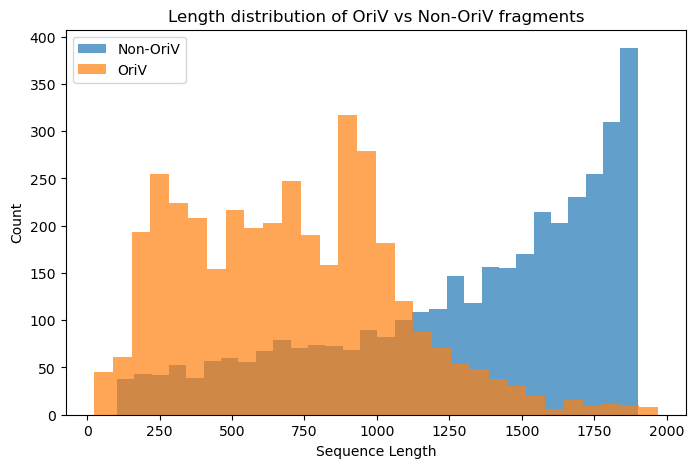

In [16]:
import matplotlib.pyplot as plt 

oriv_lengths = df[df['type_seq'] == 1]['length']
non_oriv_lengths = df[df['type_seq'] != 1]['length']

# Histogram
plt.figure(figsize=(8,5))
plt.hist(non_oriv_lengths, bins=30, alpha=0.7, label='Non-OriV')
plt.hist(oriv_lengths, bins=30, alpha=0.7, label='OriV')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.title('Length distribution of OriV vs Non-OriV fragments')
plt.legend()
plt.show()

In [17]:
df["type_seq"].value_counts()

type_seq
0    3660
1    3660
Name: count, dtype: int64

## Making train test split and val

In [18]:
df_oriv = df[df["type_seq"] == 1]
non_oriv = df[df["type_seq"] == 0]

In [19]:
len(df_oriv), len(non_oriv)

(3660, 3660)

In [20]:
df

,plasmid_id,host_species,database_source,rep_protein,oriv_sequence,oriv_length,type_seq,length
0,NaN,NaN,NaN,NaN,ATTTGCAGCTGTAACACGTACACCGAACGTGAAAATAACCGGTCAT...,NaN,0,1865
1,NaN,NaN,NaN,NaN,AGTTTCCGTTCATCGACCACTGGGTGTCTGTCATGCTGACGGTGGC...,NaN,0,1377
2,NZ_CP029585.1,Klebsiella,NaN,NaN,CAAAATGGCTTGTTTTTGTTTATTTCTGCCATTTCTTTTCTGAATG...,1094.0,1,1094
3,NZ_CP019211.1,NaN,NaN,NaN,GAATTGCCTATTTTTCAAAAGAAGACTTTCATGAATTACTTGATAT...,NaN,0,1698
4,NC_003486,NaN,doric,NaN,AAGGTTATATCCATTTAGAAAAAATAGGATTTTTCCCTTTTTAAGG...,1652.0,1,1652
...,...,...,...,...,...,...,...,...
7315,NZ_CP066373.1,Staphylococcus,NaN,NaN,ACAGAAGACTCCTTTTTGTTAAAATTATACTATAAATTCAACTTTG...,363.0,1,363
7316,NZ_CP094228.1,Klebsiella,NaN,NaN,GTTATTTAGGTAAAATCAGTCATTTACATTACACACTGACTCCAGA...,778.0,1,778
7317,NC_020123,Citrobacter,NaN,NaN,ATTTTCCCCGTGACGCCCACCTTTTTTCCCCTCAGCACACACCCAA...,853.0,1,853
7318,NZ_CP024231.1,NaN,NaN,NaN,GGTGTGCGTAAAGTCTGGCGTCAGTTGTTACGGGAAGGAATCAGGG...,NaN,0,711


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test = train_test_split(  df,  train_size=0.7, random_state=42)


In [23]:
test_df, val_df = train_test_split(test, test_size=0.5, random_state=42, shuffle=True)

In [24]:
len(train_df), len(test_df), len(val_df)

(5124, 1098, 1098)

In [25]:
test_df

,plasmid_id,host_species,database_source,rep_protein,oriv_sequence,oriv_length,type_seq,length
4372,NZ_CP051729.1,NaN,NaN,NaN,TTGTGCGTTGCGATCAACCCCGGACAATTGATATGAAAGCACGGGG...,NaN,0,653
4602,IMGPR_plasmid_2667528183_000001,Pseudomonas,NaN,NaN,GGGGCGTGCTCCTTTGTATGTTGTAGCGTGTAGTATCATACAACAT...,608.0,1,608
3269,NaN,NaN,NaN,NaN,AACTGTTCGTACCAGAGTTTGGCAACTGGTTTTTGATGACAAAGAT...,NaN,0,1831
1498,NZ_CP015063,Mesorhizobium,NaN,NaN,GCCGGCCTCCATGACAGGAGGCCACGAGCAAGCATGGCGAAGCGAG...,319.0,1,319
4595,NZ_CP076464.1,Enterococcus,NaN,NaN,TGATTACTCTCCAATCTTCTTTTTGCGCTCCTTTAATCATGTTAAT...,942.0,1,942
...,...,...,...,...,...,...,...,...
6454,NZ_CP028558.1,Acinetobacter,plsdb,MRELVVKDNALINASYNLDLVEQRLILLAIVEARESGKGINANDPL...,GAAGCACCAGTATTATTTATTATGCTATGACACCTTAATTAATTTT...,711.0,1,711
1677,NaN,NaN,NaN,NaN,AACGGGCTTATTTAGCGATATAAGGCTTTACAATAGAGAAGGAGTG...,NaN,0,1534
1758,CP011625.1,Klebsiella,NaN,NaN,TTCCGCTCGCCGCAGTCGAACGACCGAGCGTAGCGAGTCAGTGAGC...,378.0,1,378
1226,NZ_CP041116.1,NaN,NaN,NaN,TAAAAATAACATAGTCAGTACAAGTCTAGCGTTGTCTGACTTAGTC...,NaN,0,251


In [26]:
# so I can trace back how each value is predicted after training
val_df["indices"] = range(len(val_df))
test_df["indices"] = range(len(test_df))
train_df["indices"] = range(len(train_df))

In [27]:
# Percentages look at the train test split
len(train_df) / len(df) * 100, len(test_df) / len(df) * 100, len(val_df) / len(df) * 100

(70.0, 15.0, 15.0)

In [28]:
train_df["type_seq"].value_counts()

type_seq
1    2588
0    2536
Name: count, dtype: int64

### One hot encoding and dataloader

In [29]:
import numpy as np
import torch
import torch.nn as nn

In [30]:
from encoder import build_dataloaders

In [31]:
train_dl, test_dl, val_dl = build_dataloaders(train_df, test_df, val_df)

In [32]:
val_df

,plasmid_id,host_species,database_source,rep_protein,oriv_sequence,oriv_length,type_seq,length,indices
5866,NZ_LR135239.1,NaN,NaN,NaN,TTATTTTTGCAGGCTCAAGAAGAAATTTATCGGAGAAGTAATATCT...,NaN,0,1250,0
297,IMGPR_plasmid_3300028956_000005,Escherichia,imgpr,MTDLQQTYYRQVKNPNPVFTPREGAGTLPFCEKLMEKAVGFTSHFD...,AAGTGACCTCCTCAGAATAATCCGGCCCGCGCCGGAGGCATCCGCA...,915.0,1,915,1
4614,NC_015173,Staphylococcus,NaN,NaN,ATAGAATACCTCCGAGTGCTTTTGCACATAATATTTGTAACAACTT...,391.0,1,391,2
4522,NaN,NaN,NaN,NaN,AAAATCATTAAGTTAAGGTGGATACACATCTTGTCATATGATCAAA...,NaN,0,1525,3
5902,NaN,NaN,NaN,NaN,TTGTTTCAGTTTGAACCCAGGGAGGTCAGACGGATTTTTGCTGGCG...,NaN,0,1695,4
...,...,...,...,...,...,...,...,...,...
5976,CP065976.1,Leuconostoc,NaN,NaN,CGTTAAAGCGGCTTATTTGCCCGTCTAAGCGCTTTTAGTCACAAGG...,500.0,1,500,1093
4955,NZ_CP040994.1,Klebsiella,NaN,NaN,TTTCCCAGTGAACCACATAGACAGAATGACCTGTATGTTAAATTCT...,489.0,1,489,1094
2586,NZ_CP053232.1,NaN,NaN,NaN,GCCCTTTTTAGAGCGTAGTGTAAGCTGGGGTTTACGCTACGCTCTA...,NaN,0,1705,1095
5044,NaN,NaN,NaN,NaN,TCACTCATTGTTGGCTCACAGTCTTCGGCAGACTTTTTATGAGCCC...,NaN,0,546,1096


### Training the model

In [33]:
from model import DNA_CNN_Deep

In [34]:
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

In [35]:
model = DNA_CNN_Deep(seq_len=1500).to(device)

In [36]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [37]:
from torchmetrics.classification import BinaryAccuracy, BinaryPrecision, BinaryRecall, BinaryF1Score, BinaryConfusionMatrix, BinaryROC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm.auto import tqdm

In [38]:
from train_and_evaluate import train_and_test, evaluate


Epoch: 1/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.49322
Accuracy: 0.724
Precision: 0.641 | Recall: 0.998 | F1: 0.781
Train loss: 0.60308


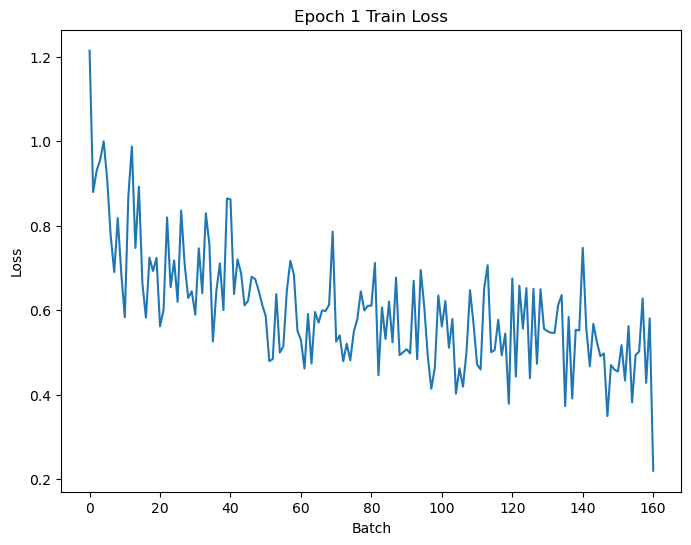

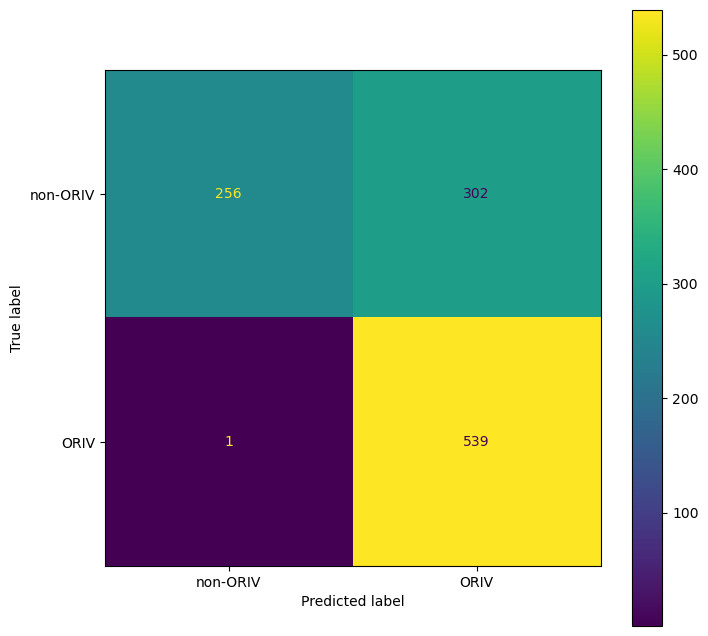


Epoch: 2/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.31200
Accuracy: 0.906
Precision: 0.943 | Recall: 0.861 | F1: 0.900

Epoch: 3/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.34227
Accuracy: 0.857
Precision: 0.779 | Recall: 0.991 | F1: 0.872

Epoch: 4/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.22910
Accuracy: 0.931
Precision: 0.931 | Recall: 0.928 | F1: 0.929

Epoch: 5/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.22124
Accuracy: 0.933
Precision: 0.940 | Recall: 0.922 | F1: 0.931

Epoch: 6/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.21543
Accuracy: 0.923
Precision: 0.952 | Recall: 0.887 | F1: 0.919

Epoch: 7/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.20874
Accuracy: 0.926
Precision: 0.894 | Recall: 0.965 | F1: 0.928

Epoch: 8/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.19076
Accuracy: 0.933
Precision: 0.910 | Recall: 0.957 | F1: 0.933

Epoch: 9/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.18157
Accuracy: 0.929
Precision: 0.934 | Recall: 0.920 | F1: 0.927

Epoch: 10/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.18911
Accuracy: 0.933
Precision: 0.903 | Recall: 0.967 | F1: 0.934

Epoch: 11/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.17190
Accuracy: 0.935
Precision: 0.924 | Recall: 0.946 | F1: 0.935
Train loss: 0.19674


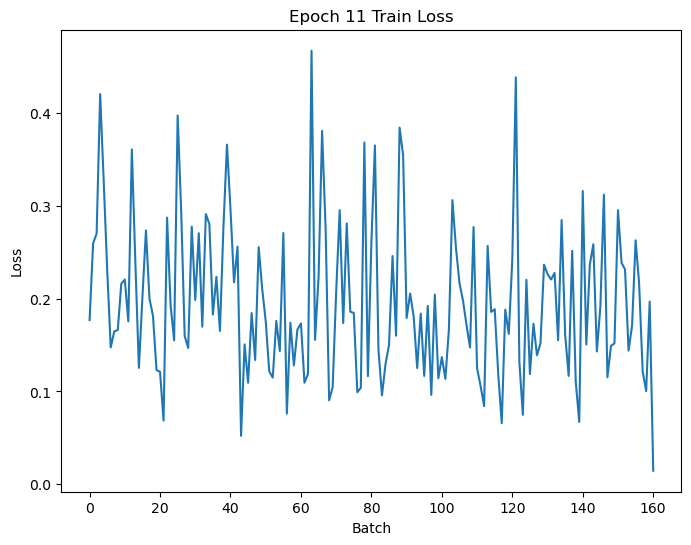

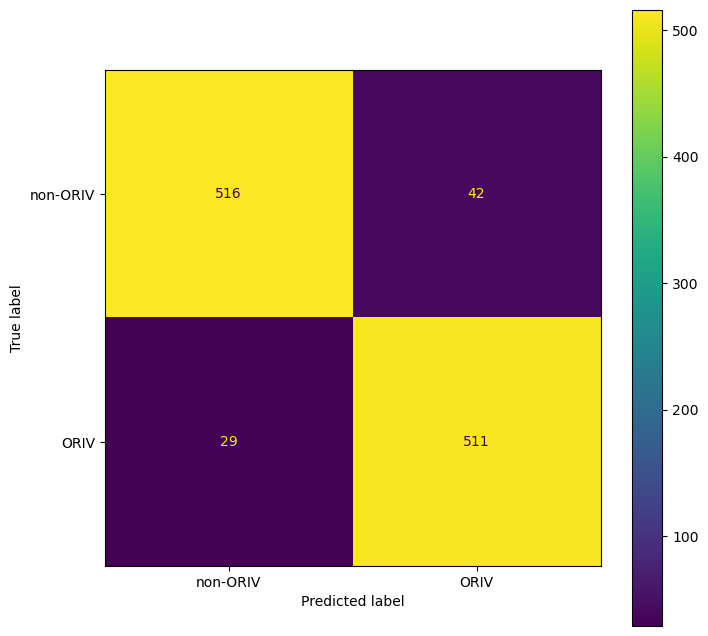


Epoch: 12/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.26437
Accuracy: 0.887
Precision: 0.981 | Recall: 0.785 | F1: 0.872

Epoch: 13/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.16274
Accuracy: 0.938
Precision: 0.934 | Recall: 0.941 | F1: 0.937

Epoch: 14/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.30762
Accuracy: 0.872
Precision: 0.981 | Recall: 0.756 | F1: 0.854

Epoch: 15/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15648
Accuracy: 0.936
Precision: 0.930 | Recall: 0.941 | F1: 0.936

Epoch: 16/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.17703
Accuracy: 0.929
Precision: 0.958 | Recall: 0.894 | F1: 0.925

Epoch: 17/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15421
Accuracy: 0.939
Precision: 0.929 | Recall: 0.948 | F1: 0.939

Epoch: 18/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.17878
Accuracy: 0.923
Precision: 0.965 | Recall: 0.876 | F1: 0.918

Epoch: 19/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15722
Accuracy: 0.934
Precision: 0.919 | Recall: 0.950 | F1: 0.934

Epoch: 20/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.19645
Accuracy: 0.919
Precision: 0.971 | Recall: 0.861 | F1: 0.913

Epoch: 21/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.17069
Accuracy: 0.933
Precision: 0.962 | Recall: 0.898 | F1: 0.929
Train loss: 0.12348


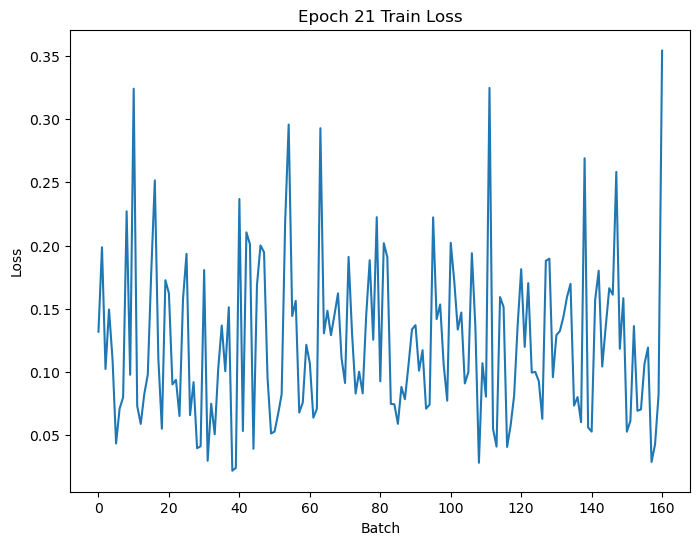

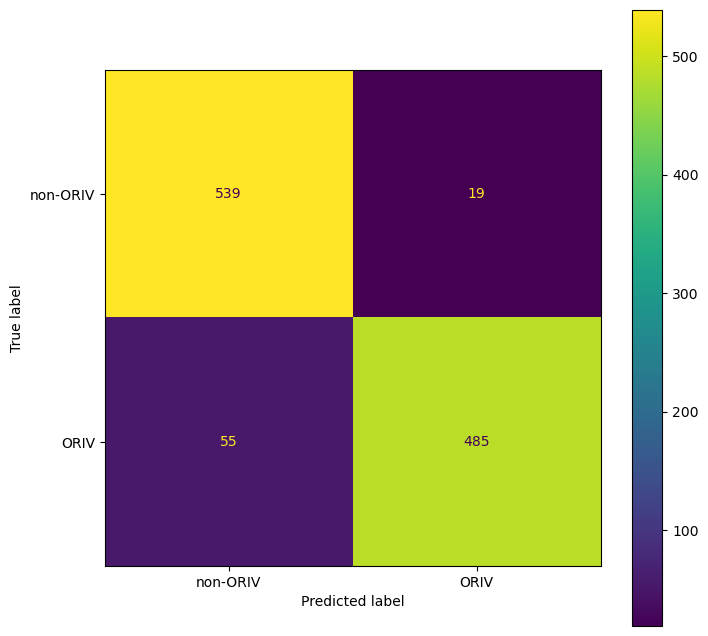


Epoch: 22/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.17572
Accuracy: 0.928
Precision: 0.962 | Recall: 0.889 | F1: 0.924

Epoch: 23/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.14733
Accuracy: 0.944
Precision: 0.944 | Recall: 0.941 | F1: 0.942

Epoch: 24/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15401
Accuracy: 0.939
Precision: 0.939 | Recall: 0.937 | F1: 0.938

Epoch: 25/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15827
Accuracy: 0.934
Precision: 0.950 | Recall: 0.913 | F1: 0.931

Epoch: 26/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.14745
Accuracy: 0.931
Precision: 0.919 | Recall: 0.943 | F1: 0.931

Epoch: 27/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15145
Accuracy: 0.936
Precision: 0.926 | Recall: 0.946 | F1: 0.936

Epoch: 28/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15047
Accuracy: 0.935
Precision: 0.914 | Recall: 0.959 | F1: 0.936

Epoch: 29/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.14061
Accuracy: 0.944
Precision: 0.943 | Recall: 0.943 | F1: 0.943

Epoch: 30/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.18838
Accuracy: 0.930
Precision: 0.968 | Recall: 0.887 | F1: 0.926

Epoch: 31/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15349
Accuracy: 0.937
Precision: 0.952 | Recall: 0.919 | F1: 0.935
Train loss: 0.07848


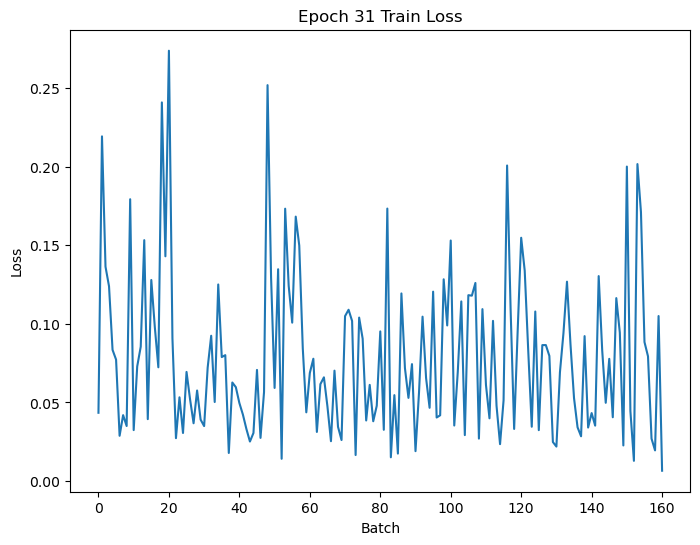

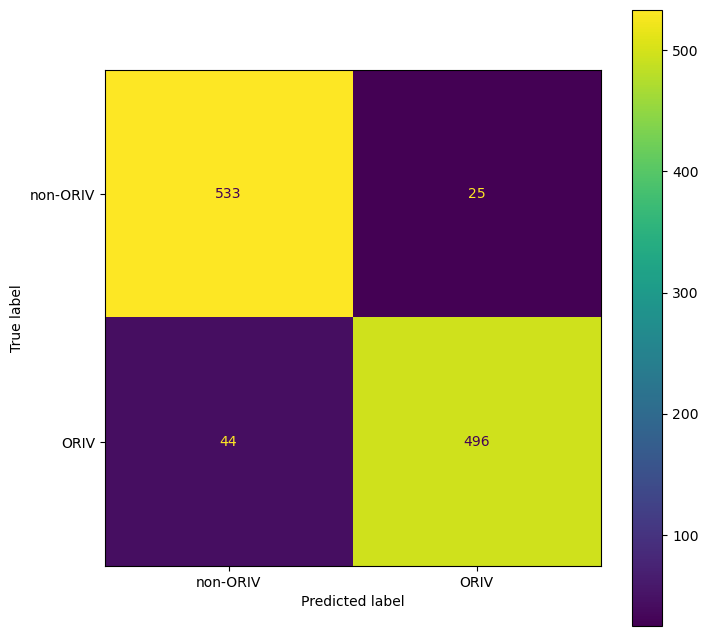


Epoch: 32/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.16200
Accuracy: 0.935
Precision: 0.906 | Recall: 0.969 | F1: 0.936

Epoch: 33/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.14868
Accuracy: 0.939
Precision: 0.936 | Recall: 0.941 | F1: 0.938

Epoch: 34/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15163
Accuracy: 0.937
Precision: 0.940 | Recall: 0.931 | F1: 0.936

Epoch: 35/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.14555
Accuracy: 0.942
Precision: 0.942 | Recall: 0.939 | F1: 0.941

Epoch: 36/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15194
Accuracy: 0.938
Precision: 0.944 | Recall: 0.930 | F1: 0.937

Epoch: 37/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.19609
Accuracy: 0.923
Precision: 0.963 | Recall: 0.876 | F1: 0.918

Epoch: 38/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.16955
Accuracy: 0.933
Precision: 0.955 | Recall: 0.906 | F1: 0.930

Epoch: 39/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15168
Accuracy: 0.939
Precision: 0.929 | Recall: 0.948 | F1: 0.939

Epoch: 40/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15364
Accuracy: 0.939
Precision: 0.931 | Recall: 0.946 | F1: 0.938

Epoch: 41/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.16543
Accuracy: 0.934
Precision: 0.906 | Recall: 0.965 | F1: 0.935
Train loss: 0.07069


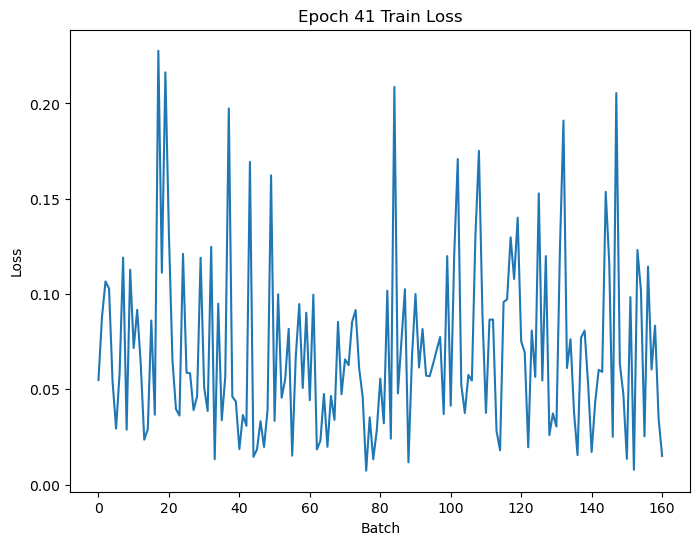

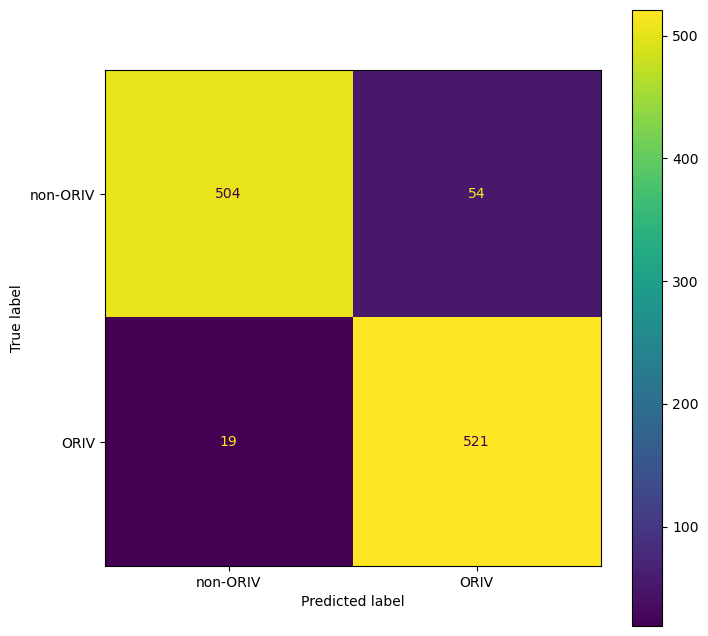


Epoch: 42/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.16033
Accuracy: 0.934
Precision: 0.908 | Recall: 0.965 | F1: 0.935

Epoch: 43/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15529
Accuracy: 0.939
Precision: 0.949 | Recall: 0.926 | F1: 0.937

Epoch: 44/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15970
Accuracy: 0.937
Precision: 0.945 | Recall: 0.926 | F1: 0.935

Epoch: 45/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.16115
Accuracy: 0.937
Precision: 0.944 | Recall: 0.928 | F1: 0.936

Epoch: 46/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15419
Accuracy: 0.939
Precision: 0.942 | Recall: 0.933 | F1: 0.938

Epoch: 47/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15045
Accuracy: 0.943
Precision: 0.946 | Recall: 0.937 | F1: 0.941

Epoch: 48/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15451
Accuracy: 0.939
Precision: 0.931 | Recall: 0.946 | F1: 0.938

Epoch: 49/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.15808
Accuracy: 0.944
Precision: 0.946 | Recall: 0.939 | F1: 0.942

Epoch: 50/50


  0%|          | 0/161 [00:00<?, ?it/s]

Seen 0 / 5124 samples
Test loss: 0.16377
Accuracy: 0.937
Precision: 0.915 | Recall: 0.961 | F1: 0.938


In [39]:
train_and_test(model=model, train_dl=train_dl, test_dl=test_dl, loss_fn=loss_fn, optimizer=optimizer, epochs=50)

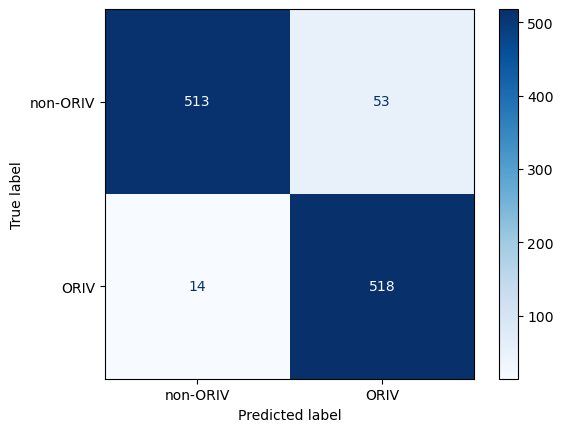

Accuracy: 0.939, Precision: 0.907, Recall: 0.974, F1: 0.939,
Saved: cnn_predictions_vs_actual.csv


In [40]:
evaluate(model,val_dl)

In [41]:
import sys
!{sys.executable} -m pip install logomaker --upgrade


[Conv1d(4, 64, kernel_size=(6,), stride=(1,), padding=(3,)), BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), ReLU(), MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,)), BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), ReLU(), AdaptiveMaxPool1d(output_size=1), Dropout(p=0.3, inplace=False), Linear(in_features=128, out_features=1, bias=True)]


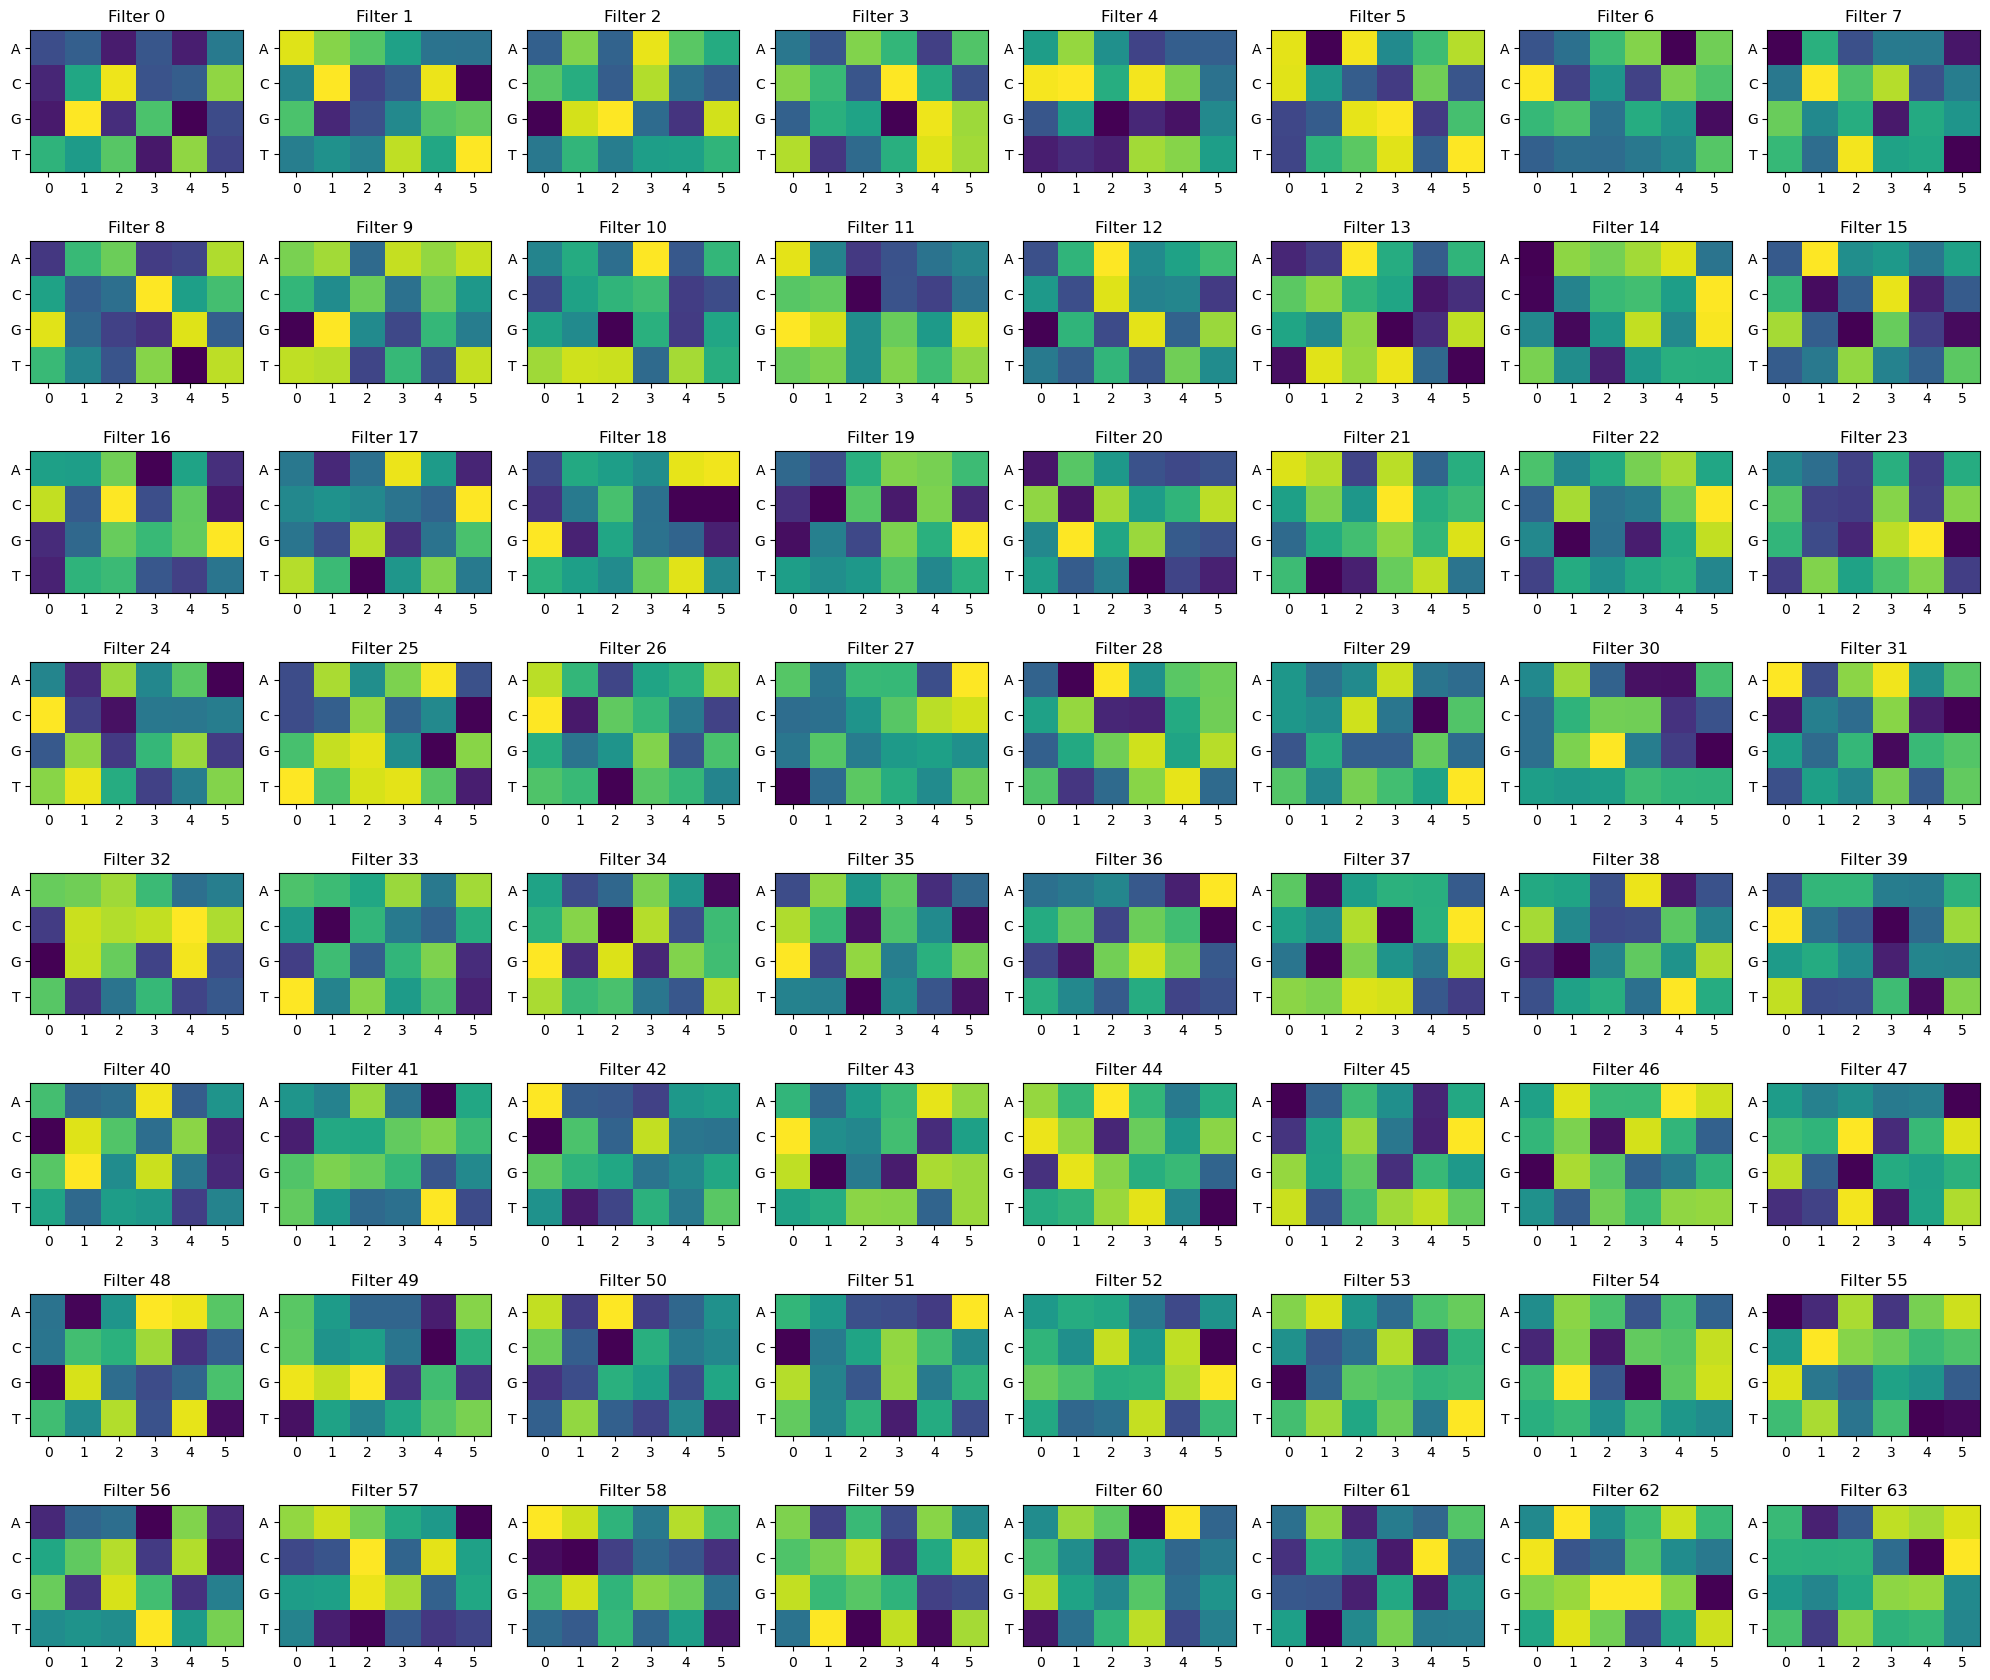

In [42]:
import logomaker
import random


def get_info(model):

    model_children =list(model.children())
    print(model_children)
    num_models = 0
    conv_layers = []
    model_weights = []
    model_bias = []
    
    for i in range(len(model_children)):
        if type(model_children[i]) == nn.Conv1d:
            num_models += 1
            conv_layers.append(model_children[i])
            model_weights.append(model_children[i].weight)
            model_bias.append(model_children[i].bias)
                              
    return conv_layers, model_weights, model_bias

    
def view_filters(model_weights, num_cols=8):
    model_weights = model_weights[0]
    num_filt = model_weights.shape[0]
    filt_width = model_weights[0].shape[1]
    num_rows = int(np.ceil(num_filt/num_cols))
    
    # visualize the first conv layer filters
    plt.figure(figsize=(20, 17))

    for i, filter in enumerate(model_weights):
        ax = plt.subplot(num_rows, num_cols, i+1)
        ax.imshow(filter.cpu().detach())
        ax.set_yticks(np.arange(4))
        ax.set_yticklabels(['A', 'C', 'G','T'])
        ax.set_xticks(np.arange(filt_width))
        ax.set_title(f"Filter {i}")

    plt.tight_layout()
    plt.show()
    
conv_layers, model_weights, bias_weights = get_info(model)
view_filters(model_weights)

In [43]:
torch.save(model, "CNN_full_model_cluster.pth")

In [44]:
df_predictions = pd.read_csv("cnn_predictions_vs_actual.csv")
df_predictions

,Unnamed: 0,predictions,labels,indices
0,0,1.0,1.0,964
1,1,1.0,1.0,86
2,2,0.0,0.0,243
3,3,0.0,0.0,914
4,4,0.0,0.0,406
...,...,...,...,...
1093,1093,0.0,0.0,1095
1094,1094,0.0,0.0,135
1095,1095,1.0,1.0,970
1096,1096,1.0,1.0,213


In [45]:
val_df

,plasmid_id,host_species,database_source,rep_protein,oriv_sequence,oriv_length,type_seq,length,indices
5866,NZ_LR135239.1,NaN,NaN,NaN,TTATTTTTGCAGGCTCAAGAAGAAATTTATCGGAGAAGTAATATCT...,NaN,0,1250,0
297,IMGPR_plasmid_3300028956_000005,Escherichia,imgpr,MTDLQQTYYRQVKNPNPVFTPREGAGTLPFCEKLMEKAVGFTSHFD...,AAGTGACCTCCTCAGAATAATCCGGCCCGCGCCGGAGGCATCCGCA...,915.0,1,915,1
4614,NC_015173,Staphylococcus,NaN,NaN,ATAGAATACCTCCGAGTGCTTTTGCACATAATATTTGTAACAACTT...,391.0,1,391,2
4522,NaN,NaN,NaN,NaN,AAAATCATTAAGTTAAGGTGGATACACATCTTGTCATATGATCAAA...,NaN,0,1525,3
5902,NaN,NaN,NaN,NaN,TTGTTTCAGTTTGAACCCAGGGAGGTCAGACGGATTTTTGCTGGCG...,NaN,0,1695,4
...,...,...,...,...,...,...,...,...,...
5976,CP065976.1,Leuconostoc,NaN,NaN,CGTTAAAGCGGCTTATTTGCCCGTCTAAGCGCTTTTAGTCACAAGG...,500.0,1,500,1093
4955,NZ_CP040994.1,Klebsiella,NaN,NaN,TTTCCCAGTGAACCACATAGACAGAATGACCTGTATGTTAAATTCT...,489.0,1,489,1094
2586,NZ_CP053232.1,NaN,NaN,NaN,GCCCTTTTTAGAGCGTAGTGTAAGCTGGGGTTTACGCTACGCTCTA...,NaN,0,1705,1095
5044,NaN,NaN,NaN,NaN,TCACTCATTGTTGGCTCACAGTCTTCGGCAGACTTTTTATGAGCCC...,NaN,0,546,1096


In [46]:
df_predictions = pd.read_csv("cnn_predictions_vs_actual.csv")
df_predictions

,Unnamed: 0,predictions,labels,indices
0,0,1.0,1.0,964
1,1,1.0,1.0,86
2,2,0.0,0.0,243
3,3,0.0,0.0,914
4,4,0.0,0.0,406
...,...,...,...,...
1093,1093,0.0,0.0,1095
1094,1094,0.0,0.0,135
1095,1095,1.0,1.0,970
1096,1096,1.0,1.0,213


In [47]:
df_joined = pd.merge(
    val_df,
    df_predictions,
    left_on="indices",
    right_on="indices",
    how="inner"
)

In [48]:
df_joined.to_csv("dirty_look.csv")

In [49]:
import sys
!{sys.executable} -m pip install shapzero --upgrade


# Still working on this part

In [50]:
import shapzero
q = 5   # alphabet size (q=4 nucleotides for DNA and RNA, q=20 amino acids for proteins)
n = 1500  # sequence length
explainer = shapzero.init(
    q=q,
    n=n,
    model=model,
    exp_dir="/Users/amamu656/Desktop/ORIV"
)



Output files will be saved in: /Users/amamu656/Desktop/ORIV


In [51]:
class ModelScorer:
    def __init__(self, model_path, q, n):
        self.model = model_path
        self.q = q
        self.n = n

    def predict(self, samples_numpy_array):
        scores = compute_cnn_scores(
            model=self.model,
            qary_numpy_array=samples_numpy_array,
            q=self.q,
            n=self.n
        )
        return np.array(scores)

In [52]:
scorer = ModelScorer(model_path="CNN_full_model_cluster.pth", q=q, n=n)

In [53]:
seqs = shapzero.load_dna_sequences_to_explain()# list of strings
print(seqs)
explainer.compute_fourier_transform(
    budget=30000, verbose=True
)
shap = explainer.explain(seqs, explanation='shap_value') # list of SHAP values
print(shap[0])

explainer.plot()

['ACTCTTGAGG', 'TATATCTGTG', 'GATGTATAGG', 'TTGATGAAAG', 'CTTGCTGCTG', 'TTATCATCAG', 'GACAACAACG', 'TGTCGTCATG', 'AAGCCAGCCG', 'AGGGTGGGTG', 'ACCTACCGAG', 'CCTTGGGGTG', 'TCCATTCCTG', 'TCATGTCAAG', 'AAAAGTAAAG', 'TCATGTCTTG', 'GCAGATAGCG', 'ACATTCAGCG', 'CTGCTCTCTG', 'CAGATGCCCG', 'CAGTGAAGCG', 'CCCCAGCAGG', 'CCCGCCGCAG', 'ACCCCCAAAG', 'CATGCAGAAG', 'TCCGCCACCG', 'GAAGCCGGTG', 'TCGCGGCGAG', 'CAAAGAGGTG', 'CGGCTCCCAG', 'GGGAGCCCAG', 'GACAGAGCTG', 'CGGGGGCGCG', 'CTGTGTCATG', 'AGTGGACCAG', 'TCCTCCATTG', 'CTGCGCCTCG', 'TTATAAGATG', 'TGCACCTCTG', 'GTTATAGATG', 'GGAGAAGCAG', 'CTGAGGACCG', 'CTACATCCTG', 'CCCCTTTCTG', 'GAAGACTGAG', 'TCACAAACTG', 'GCGCGTCCTG', 'GACAACAGTG', 'AGCAAAGGAG', 'AAGCTCCTCG', 'CCCTCTGCTG', 'GTCCAAGTTG', 'TGCCACAGCG', 'CTGGATCCAG', 'GGCTCTGCAG', 'TTTGCTCCTG', 'GGAGGAAGTG', 'CCTACCCCAG', 'CTGACCCTTG', 'GAACTCTAAG', 'GTCAGATTCG', 'GGGAATGGGG', 'GGGAGGGTGG', 'GAAGGGGGAG', 'GACCAACTTG', 'AGAGTTACAG', 'GTGGAAGGGG', 'CACGCCTCGG', 'GTGTGGCTTG', 'GACTGGCAGG', 'GGGCTCTTGG', 'TTTG

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 2 is not equal to len(dims) = 3